# Plot the Results of the Edge Classification
---

## Imports & Global Information

In [2]:
import glob, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pprint
from sklearn.metrics import confusion_matrix

# Utilities for plotting
sys.path.append("../")
from utils.plotting import plot_stt, plot_isochrones

In [3]:
# to get access to the pdg database 2024 version
import pdg

PdgApi = pdg.connect(
    "sqlite:////home/nikin105/mlProject/data/pdg/pdgall-2024-v0.1.0.sqlite"
)

## Data Input and Image Output Paths

In [11]:
channel = "mum5mup5"
project_name = "layerwise_v2"
event_num = 10054
save_figs = True

image_dir = f"/home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/{channel}/{project_name}/classification/"
os.makedirs(image_dir, exist_ok=True)
input_dir = f"/home/nikin105/mlProject/data/machineLearning/{channel}/classification/{project_name}/test/"
proc_files = sorted(glob.glob(os.path.join(input_dir, "*")))
data = torch.load(f"{input_dir}/{event_num}", map_location="cpu")

## Inspect the Data

In [12]:
for key in data.keys:
    print(key, ":")
    if key == "event_file":
        pprint.pp(data[key])
    elif data[key].ndim == 2:
        pprint.pp(data[key][0:10, 0:10])
    else:
        pprint.pp(data[key][0:10])
    print()

pdgcode :
tensor([-13, -13, -13, -13, -13, -13, -13, -13, -13, -13], dtype=torch.int32)

pt :
tensor([0.0734, 0.0724, 0.0721, 0.0717, 0.0716, 0.0713, 0.0710, 0.0709, 0.0711,
        0.0711], dtype=torch.float64)

ptheta :
tensor([2.5397, 2.5401, 2.5427, 2.5461, 2.5464, 2.5486, 2.5519, 2.5525, 2.5503,
        2.5498], dtype=torch.float64)

primary :
tensor([True, True, True, True, True, True, True, True, True, True])

event_file :
10054

pid :
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=torch.int32)

pphi :
tensor([1.4783, 1.4022, 1.3520, 1.2711, 1.1920, 1.1273, 1.0524, 0.9814, 0.9191,
        0.8415], dtype=torch.float64)

true_edges :
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

y_pid :
tensor([ True, False, False, False, False, False, False, False, False, False])

vertex :
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
  

## Plot Graphs

#### Data Preparation

In [13]:
# Convert hit positions from scaled polar coordinates to cartesian coordinates
r = data.x[:, 0].detach().numpy() * 100
phi = data.x[:, 1].detach().numpy() * np.pi
isochrones = data.x[:, 2].detach().numpy() * 100

x = r * np.cos(phi)
y = r * np.sin(phi)

# Get the number of hits
n_hits = len(data.x)

# Prepare the colors for the different pids
pid_color_palette = sns.color_palette("tab20")

# Rename some variables for better readability
gt = data.true_edges
input_edges = torch.cat([data.edge_index, data.edge_index.flip(0)], dim=-1)
edge_labels = data.y_pid.repeat(2)
hid = data.hid
pids = data.pid
pdg_codes = data.pdgcode
edge_scores = data.scores
true_scores = edge_scores[edge_labels == 1]
false_scores = edge_scores[edge_labels == 0]

# Get true and false input edges
true_input_edges = input_edges[:, edge_labels == 1]
false_input_edges = input_edges[:, edge_labels == 0]

# Get the unique particle ids
unique_pids = np.unique(pids)

#### Edge Scores

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//edge_scores_10054.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//edge_scores_10054.pdf


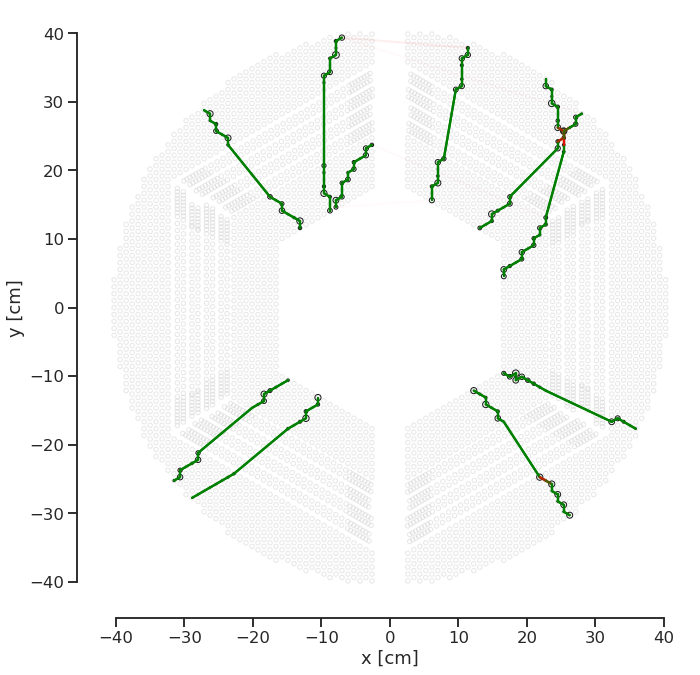

In [14]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(input_edges[0])):
    x_start = x[input_edges[0][i_edge]]
    x_end = x[input_edges[1][i_edge]]
    y_start = y[input_edges[0][i_edge]]
    y_end = y[input_edges[1][i_edge]]
    if edge_labels[i_edge]:
        edge_color = "green"
    else:
        edge_color = "red"
    ax.plot(
        [x_start, x_end],
        [y_start, y_end],
        color=edge_color,
        alpha=edge_scores[i_edge].item(),
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/edge_scores_{event_num}.png")
    plt.savefig(f"{image_dir}/edge_scores_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/edge_scores_{event_num}.pdf")
    plt.savefig(f"{image_dir}/edge_scores_{event_num}.pdf", dpi=300)
else:
    plt.show()

### Edge Scores for True Edges

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//true_edge_scores_10054.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//true_edge_scores_10054.pdf


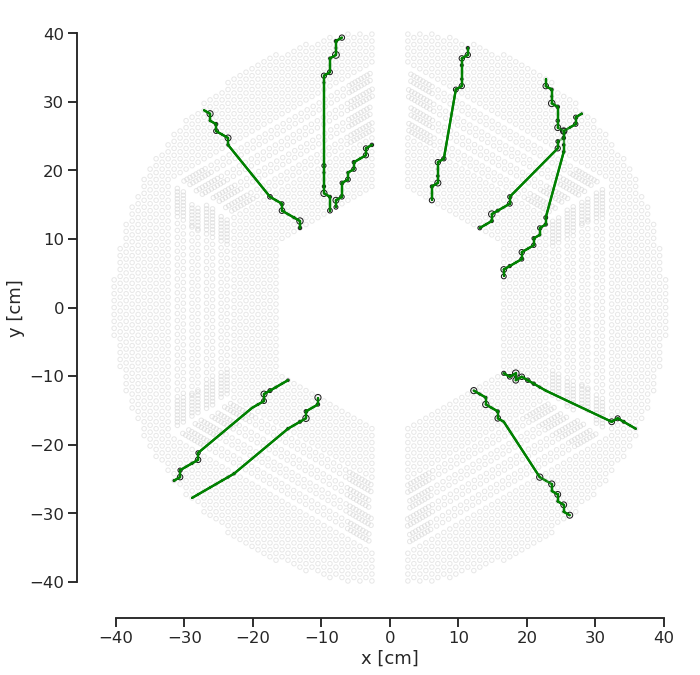

In [15]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(true_input_edges[0])):
    x_start = x[true_input_edges[0][i_edge]]
    x_end = x[true_input_edges[1][i_edge]]
    y_start = y[true_input_edges[0][i_edge]]
    y_end = y[true_input_edges[1][i_edge]]
    ax.plot(
        [x_start, x_end],
        [y_start, y_end],
        color="green",
        alpha=true_scores[i_edge].item(),
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/true_edge_scores_{event_num}.png")
    plt.savefig(f"{image_dir}/true_edge_scores_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/true_edge_scores_{event_num}.pdf")
    plt.savefig(f"{image_dir}/true_edge_scores_{event_num}.pdf", dpi=300)
else:
    plt.show()

### Edge Scores for False Edges

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//false_edge_scores_10054.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//false_edge_scores_10054.pdf


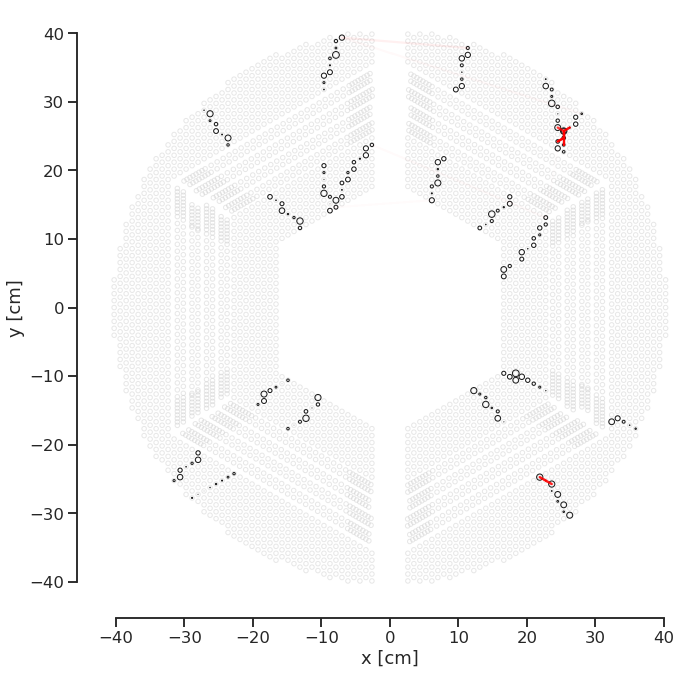

In [16]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(false_input_edges[0])):
    if not edge_labels[i_edge]:
        x_start = x[false_input_edges[0][i_edge]]
        x_end = x[false_input_edges[1][i_edge]]
        y_start = y[false_input_edges[0][i_edge]]
        y_end = y[false_input_edges[1][i_edge]]
        ax.plot(
            [x_start, x_end],
            [y_start, y_end],
            color="red",
            alpha=false_scores[i_edge].item(),
        )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/false_edge_scores_{event_num}.png")
    plt.savefig(f"{image_dir}/false_edge_scores_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/false_edge_scores_{event_num}.pdf")
    plt.savefig(f"{image_dir}/false_edge_scores_{event_num}.pdf", dpi=300)
else:
    plt.show()

### Differences Between Real and Assigned Score

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//edge_score_diff_10054.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/classification//edge_score_diff_10054.pdf


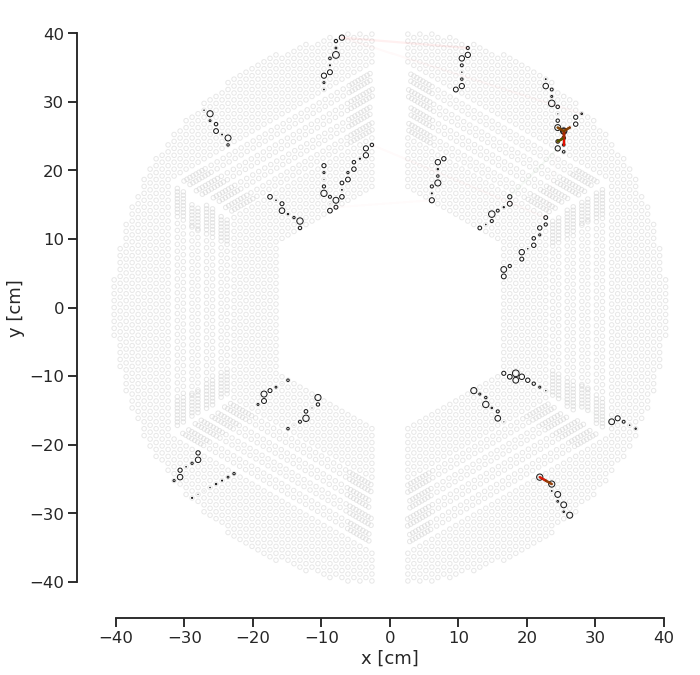

In [17]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(input_edges[0])):
    x_start = x[input_edges[0][i_edge]]
    x_end = x[input_edges[1][i_edge]]
    y_start = y[input_edges[0][i_edge]]
    y_end = y[input_edges[1][i_edge]]
    if edge_labels[i_edge]:
        edge_color = "green"
    else:
        edge_color = "red"
    ax.plot(
        [x_start, x_end],
        [y_start, y_end],
        color=edge_color,
        alpha=abs(edge_scores[i_edge].item() - edge_labels[i_edge].item()),
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/edge_score_diff_{event_num}.png")
    plt.savefig(f"{image_dir}/edge_score_diff_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/edge_score_diff_{event_num}.pdf")
    plt.savefig(f"{image_dir}/edge_score_diff_{event_num}.pdf", dpi=300)
else:
    plt.show()

## Plot Network Performance

### Data Preparation

In [18]:
proc_files = sorted(glob.glob(os.path.join(input_dir, "*")))

full_df = pd.DataFrame({"score": [], "label": []})
for file in proc_files:
    d = torch.load(file, map_location="cpu")
    df = pd.DataFrame({"score": d.scores, "label": d.y_pid.repeat(2)})
    full_df = pd.concat([full_df, df], ignore_index=True)
full_df

,score,label
0,0.999805,1.0
1,0.000028,0.0
2,0.000175,0.0
3,0.000005,0.0
4,0.001890,0.0
...,...,...
1677445,0.000007,0.0
1677446,0.000003,0.0
1677447,0.000002,0.0
1677448,0.000002,0.0


### Model Output

bin width: 0.024000000000000007


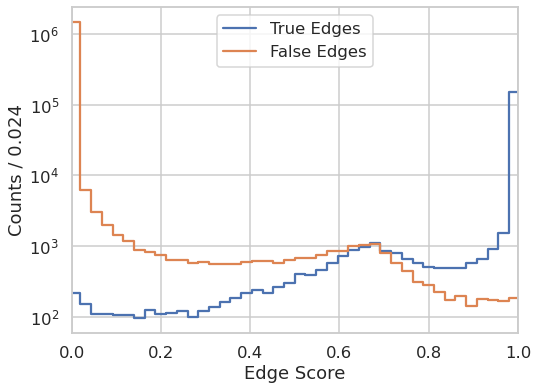

In [19]:
sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(-0.1, 1.1, 51)
bin_width = bins[1] - bins[0]
print("bin width:", bin_width)
sns.histplot(
    full_df[full_df.label == 1],
    x="score",
    bins=bins,
    ax=ax,
    element="step",
    fill=False,
    label="True Edges",
)
sns.histplot(
    full_df[full_df.label == 0],
    x="score",
    bins=bins,
    ax=ax,
    element="step",
    fill=False,
    label="False Edges",
)
ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.legend(loc="upper center")
ax.set_xlabel("Edge Score")
ax.set_ylabel(f"Counts / {bin_width:.3f}")
plt.show()

### Edge Score Cut

In [8]:
n_cuts = 1000
score_cuts = np.linspace(0, 1, n_cuts)
true_positive_rate = np.zeros(n_cuts)
false_positive_rate = np.zeros(n_cuts)
signal_efficiency = np.zeros(n_cuts)
background_rejection_rate = np.zeros(n_cuts)
n_positive_edges = len(full_df[full_df.label == 1])
n_negative_edges = len(full_df[full_df.label == 0])
# Edge scores for true edges
positive_scores = full_df[full_df.label == 1].score.values
# Edge scores for false edges
negative_scores = full_df[full_df.label == 0].score.values
i = 0
for cut in score_cuts:
    # True edges that survive the score cut
    n_true_positive = len(positive_scores[positive_scores > cut])
    # False edges that survive the score cut
    n_false_positive = len(negative_scores[negative_scores > cut])
    # False edges that do not survive the score cut
    n_true_negative = len(negative_scores[negative_scores <= cut])
    # True edges that do not survive the score cut
    n_false_negative = len(positive_scores[positive_scores <= cut])
    # Calculate the TPR and FPR
    true_positive_rate[i] = n_true_positive / (n_true_positive + n_false_negative)
    false_positive_rate[i] = n_false_positive / (n_false_positive + n_true_negative)
    # Calculate the signal efficiency and background rejection rate
    signal_efficiency[i] = n_true_positive / n_positive_edges
    background_rejection_rate[i] = n_true_negative / n_negative_edges
    i += 1

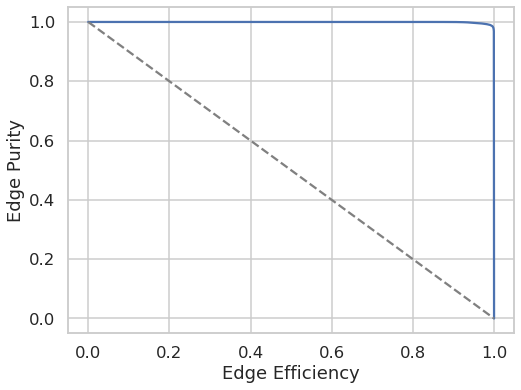

In [9]:
plt.close("all")
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(true_positive_rate, 1 - false_positive_rate)
ax.set_xlabel("Edge Efficiency")
ax.set_ylabel("Edge Purity")
ax.plot((0,1),(1,0), linestyle="--", color="gray")

plt.show()

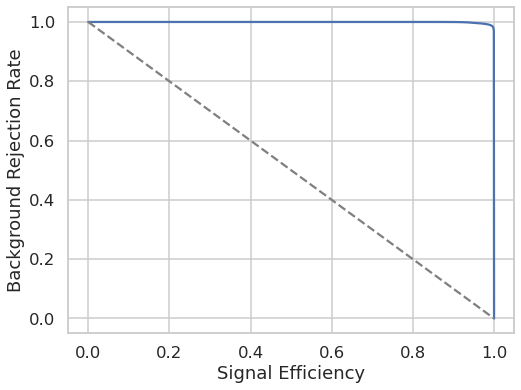

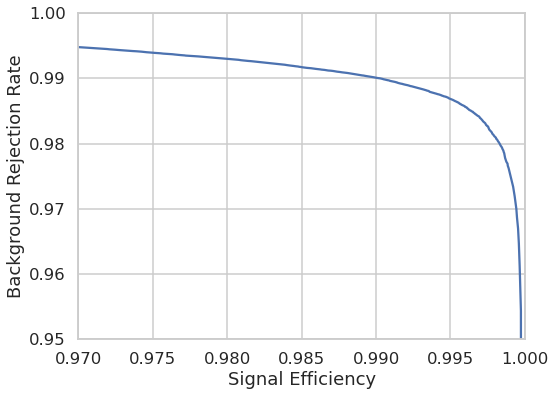

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(signal_efficiency, background_rejection_rate)
ax.set_xlabel("Signal Efficiency")
ax.set_ylabel("Background Rejection Rate")
ax.plot((0,1),(1,0), linestyle="--", color="gray")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(signal_efficiency, background_rejection_rate)
ax.set_xlabel("Signal Efficiency")
ax.set_ylabel("Background Rejection Rate")
ax.set_ylim(0.95, 1)
ax.set_xlim(0.97, 1)
plt.show()

In [14]:
y_pred = np.zeros(len(full_df.score))

for i in range(len(full_df.score)):
    if full_df.score[i] > score_cuts[cut]:
        y_pred[i] = 1

cm = confusion_matrix(full_df.y_pid, y_pred)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

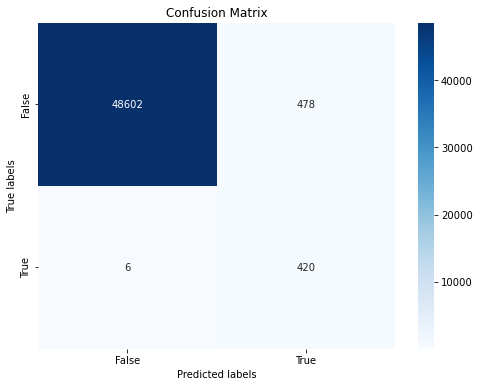

In [128]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y_pid),
    yticklabels=np.unique(y_pid),
)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

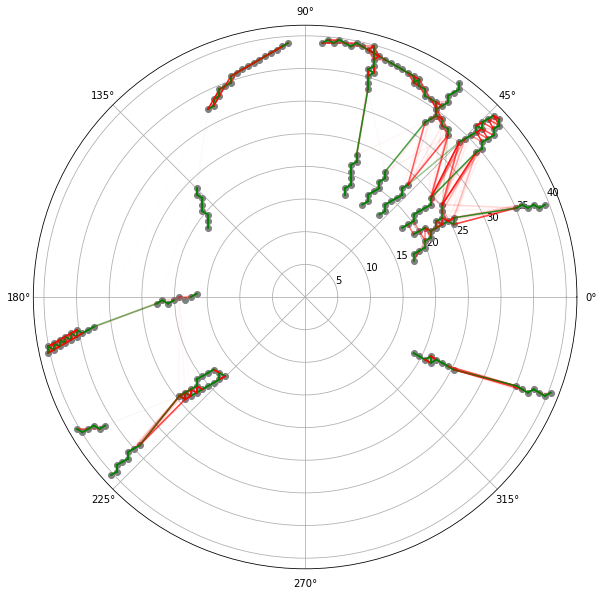

In [136]:
data = torch.load(f"{evt_num}", map_location=torch.device("cpu"))

r = data["x"][:, 0].detach().numpy() * 100
phi = data["x"][:, 1].detach().numpy() * np.pi

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(10, 10))
plt.plot(phi, r, marker="o", linestyle="", color="gray")

input_edges = torch.cat([data["edge_index"], data["edge_index"].flip(0)], dim=-1)
y_pid = data["y_pid"].repeat(2)

# n_input_edges = len(data["edge_index"][1])
n_input_edges = len(input_edges[1])

for input_edge in range(n_input_edges):
    if data["scores"][input_edge].item() < score_cuts[cut]:
        continue
    edge = input_edges[:, input_edge].detach().numpy()
    r1 = r[edge[0]]
    r2 = r[edge[1]]
    phi1 = phi[edge[0]]
    phi2 = phi[edge[1]]
    if y_pid[input_edge] == 1:
        ax.plot(
            [phi1, phi2],
            [r1, r2],
            marker="",
            linestyle="-",
            color="green",
            alpha=data["scores"][input_edge].item(),
        )
    else:
        ax.plot(
            [phi1, phi2],
            [r1, r2],
            marker="",
            linestyle="-",
            color="red",
            alpha=data["scores"][input_edge].item(),
        )

plt.show()